In [ ]:
import torch

X = torch.tensor([
    [3., 5.],
    [5., 1.],
    [10., 2.]
])

y= torch.tensor([
    [75.],
    [82.],
    [93.]
])

w1= torch.tensor([
    [2., 7., 4.], 
    [-1., 3., -3.]], 
    requires_grad=True)
w2= torch.tensor([-2., 2., -4.], requires_grad=True)

def relu(X):
    return torch.max(torch.tensor(0.), X)

z2 = X@w1
z2

tensor([[ 1., 36., -3.],
        [ 9., 38., 17.],
        [18., 76., 34.]], grad_fn=<MmBackward0>)

In [59]:
a2=relu(z2)
a2

tensor([[ 1., 36.,  0.],
        [ 9., 38., 17.],
        [18., 76., 34.]], grad_fn=<MaximumBackward0>)

In [60]:
y_hat = a2@w2
y_hat

tensor([ 70., -10., -20.], grad_fn=<MvBackward0>)

In [61]:
loss = ((y_hat - y)**2).mean()
loss

tensor(6577.1113, grad_fn=<MeanBackward0>)

In [62]:
loss.backward() # Berechne die Ableitung der Loss-Funktion nach allen Variablen, die requires_grad=True haben

In [63]:
w1.grad

tensor([[ 2053.3333, -2053.3333,  4000.0000],
        [  488.8889,  -488.8889,   800.0000]])

In [64]:
w2.grad

tensor([-1808.8888, -7920.0000, -3400.0000])

![image.png](image.png)

In [65]:
# w1 muss größer werden, wenn w1.grad negativ ist
# w1 muss kleiner werden, wenn w1.grad positiv ist


lr=0.0001  # Schrittweite, um die Gewichte zu aktualisieren
w1=w1-(w1.grad *lr )    # Gewichte aktualisieren

w2=w2-(w2.grad *lr )    # Gewichte aktualisieren

z2 = X@w1
a2=relu(z2)
y_hat = a2@w2
loss = ((y_hat - y)**2).mean()
loss


tensor(806.4979, grad_fn=<MeanBackward0>)

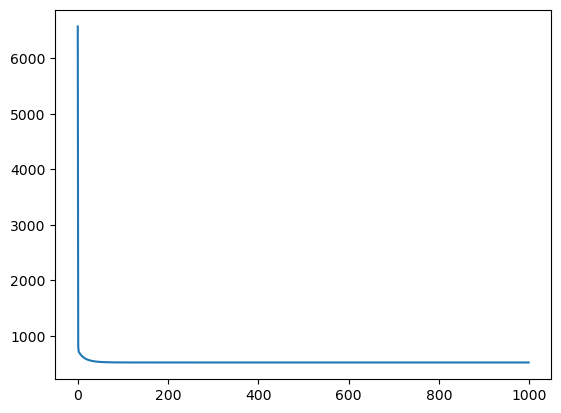

517.8518676757812


In [75]:
import matplotlib.pyplot as plt


epochs=1000
losses=[]
w1= torch.tensor([[2., 7., 4.], [-1., 3., -3.]], requires_grad=True)
w2= torch.tensor([-2., 2., -4.], requires_grad=True)
lr=0.0001  # Schrittweite, um die Gewichte zu aktualisieren

for i in range(epochs):
    z2 = X@w1                   # z2 berechnen
    a2=relu(z2)                 # a2 berechnen
    y_hat = a2@w2               # y_hat berechnen
    loss = ((y_hat - y)**2).mean() #MSE
    loss.backward()             # Ableitung durchführen
    losses.append(loss.item())
    with torch.no_grad():
        w1=w1.sub_(w1.grad *lr )    # Gewichte w1 aktualisieren
        w2=w2.sub_(w2.grad *lr )    # Gewichte w2 aktualisieren
        w1.grad.zero_()         # Gradienten zurücksetzen
        w2.grad.zero_()         # Gradienten zurücksetzen
        

plt.plot(losses)
plt.show()
print(losses[-1])


In [76]:
z2 = X@w1
a2=relu(z2)
y_hat = a2@w2
y_hat

tensor([ 83.3334,  50.0000, 100.0000], grad_fn=<MvBackward0>)

In [77]:
y

tensor([[75.],
        [82.],
        [93.]])